Problem 1

In [181]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

breast = load_breast_cancer()
X = breast.data
Y = breast.target
print(X.shape)

breast_input = pd.DataFrame(X)
breast_input.head()

(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [183]:
print(X_train)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]


In [184]:
n_components = 10
pca = PCA(n_components = n_components)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [185]:
k_values = range(2, n_components+1)
print(k_values)
results = {}

range(2, 11)


In [186]:
svm_metrics = {"accuracies": {}, "precisions": {}, "recalls": {}}
for K in tqdm(k_values):
  
  accuracies, precisions, recalls = [], [], []
  
  svm = SVC(kernel = 'linear')
  svm.fit(X_train_pca[:,:K], y_train)

  y_pred = svm.predict(X_test_pca[:,:K])

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  svm_metrics["accuracies"][K] = accuracy
  svm_metrics["precisions"][K] = precision
  svm_metrics["recalls"][K] = recall

print(svm_metrics)

100%|██████████| 9/9 [00:11<00:00,  1.27s/it]

{'accuracies': {2: 0.9649122807017544, 3: 0.9649122807017544, 4: 0.9649122807017544, 5: 0.9649122807017544, 6: 0.9649122807017544, 7: 0.956140350877193, 8: 0.9649122807017544, 9: 0.9736842105263158, 10: 0.956140350877193}, 'precisions': {2: 0.9466666666666667, 3: 0.9466666666666667, 4: 0.958904109589041, 5: 0.958904109589041, 6: 0.958904109589041, 7: 0.9459459459459459, 8: 0.958904109589041, 9: 0.9722222222222222, 10: 0.9459459459459459}, 'recalls': {2: 1.0, 3: 1.0, 4: 0.9859154929577465, 5: 0.9859154929577465, 6: 0.9859154929577465, 7: 0.9859154929577465, 8: 0.9859154929577465, 9: 0.9859154929577465, 10: 0.9859154929577465}}


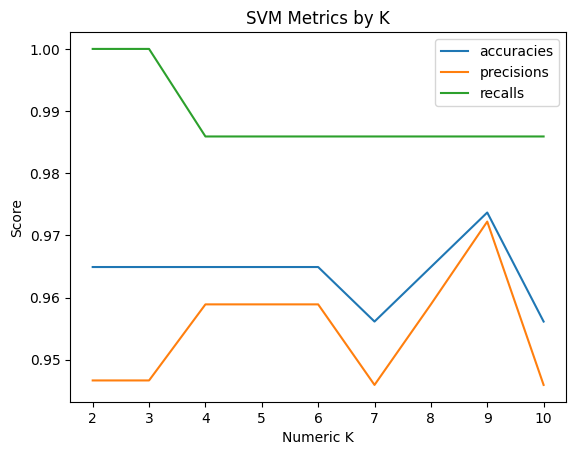

In [187]:
# 9 is the best K value
metrics_to_plot = list(svm_metrics.keys())
x_values = list(svm_metrics[list(svm_metrics.keys())[0]].keys())

# Plot
fig, ax = plt.subplots()
for metric in metrics_to_plot:
    y_values = list(svm_metrics[metric].values())
    ax.plot(x_values, y_values, label=metric)

ax.set_xlabel('Numeric K')
ax.set_ylabel('Score')
ax.set_title('SVM Metrics by K')
ax.legend()

plt.show()


In [188]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = {}
K = 9 # Best K
for kernel in tqdm(kernels):
  
  svm = SVC(kernel = kernel)
  svm.fit(X_train_pca[:,:K], y_train)

  y_pred = svm.predict(X_test_pca[:,:K])

  accuracy = accuracy_score(y_test, y_pred)

  kernel_accuracies[kernel] = accuracy

print(kernel_accuracies)

100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

{'linear': 0.9736842105263158, 'poly': 0.8771929824561403, 'rbf': 0.9473684210526315, 'sigmoid': 0.9210526315789473}


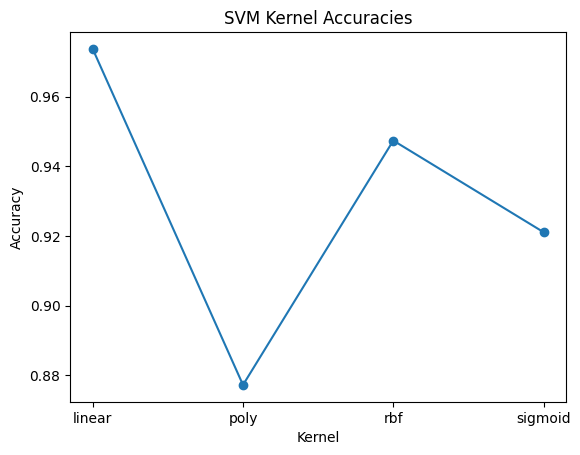

In [189]:
# Convert the dictionary into two lists
kernel_names = list(kernel_accuracies.keys())
accuracies = list(kernel_accuracies.values())

# Plot the accuracies as a line graph
plt.plot(kernel_names, accuracies, marker='o')

# Add labels and title
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernel Accuracies')

# Show the plot
plt.show()


Problem 2

In [190]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv("Housing.csv")
display(df) 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [192]:
X = np.sort(5*np.random.rand(40,1), axis = 0)
y = np.sin(X).ravel()

y[::5] += 3*(0.5 - np.random.rand(8))

In [193]:
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C=1e3, degree = 2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

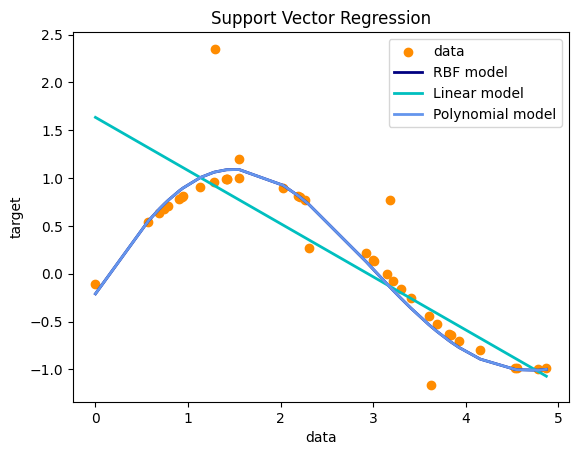

In [194]:
lw = 2
plt.scatter(X,y, color = 'darkorange', label = 'data')
plt.plot(X, y_rbf, color = 'navy', lw = lw, label = 'RBF model')
plt.plot(X, y_lin, color = 'c', lw = lw, label = 'Linear model')
plt.plot(X, y_rbf, color = 'cornflowerblue', lw = lw, label = 'Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [195]:
reduced_df = df.loc[:,["area", "bedrooms", "bathrooms", "stories", "mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "parking", "prefarea"]]
price = df.iloc[:,0]

for column_index in [4, 5, 6, 7, 8, 10]:
  reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
display(reduced_df.head())

maxes = []

print(price)
print(reduced_df.iloc[:,:])
print(maxes)

<ipython-input-195-11c7eef3f1c0>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
<ipython-input-195-11c7eef3f1c0>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  reduced_df.iloc[:,column_index] = reduced_df.iloc[:,column_index].map({"yes": 1, "no": 0})
<ipython-input-195-11c7eef3f1c0>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old b

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
     area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0    7420         4          2        3         1          0         0   
1    8960         4          4        4         1          0         0   
2    9960         3          2        2         1          0         1   
3    7500         4          2        2         1          0         1   
4    7420         4          1        2         1          1         1   
..    ...       ...        ...      ...       ...        ...       ...   
540  3000         2          1        1         1          0         1   
541  2400         3          1        1         0          0         0   
542  3620         2          1        1         1          0         0   
543  2910         3          1        1      

In [196]:
X_train, X_test, y_train, y_test = train_test_split(reduced_df.values, price.values, test_size = 0.2, random_state =42)

In [197]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

n_components = range(1, X_train.shape[1]+1)
scores = []

In [198]:
for n in n_components:
  svr = SVR()
  svr.fit(X_train_pca[:, :n], y_train)
  y_pred = svr.predict(X_test_pca[:,:n])
  score = r2_score(y_test, y_pred)
  scores.append(score)

In [199]:
optimum_n_components = np.argmax(scores) + 1
print(optimum_n_components)

1


In [200]:
svr = SVR(kernel='rbf')
svr.fit(X_train_pca[:, :optimum_n_components], y_train)

SVR()

In [201]:
y_pred = svr.predict(X_test_pca[:, :optimum_n_components])
print(y_pred)

[4291068.98955874 4291089.52159321 4290965.72764248 4291019.75280006
 4290962.19213546 4291093.91286161 4291083.5352839  4291019.14249043
 4290941.8539253  4290941.25821126 4291082.4804787  4290961.09165955
 4290953.00663587 4290940.51443793 4290962.62185331 4290950.15590936
 4290955.63616191 4291073.25297322 4291066.74140881 4291073.25296271
 4291020.97246374 4291095.4251093  4290950.72949501 4290955.8196302
 4291088.1311603  4291060.37359039 4290940.45163276 4290940.08047563
 4291035.35010263 4290940.08047533 4290963.9321806  4290940.65310802
 4291073.252972   4291092.02657963 4291006.02221859 4290995.53258685
 4290998.25932076 4290941.17416974 4290946.17129567 4290940.5497747
 4291092.2453039  4290950.15590622 4291087.50485516 4290973.42627245
 4291094.38264809 4291068.32308679 4291073.25297187 4290997.90219566
 4291091.24427047 4290940.08047586 4291097.36479904 4290940.08047556
 4291094.88183551 4290989.70745247 4290950.45589755 4290940.05253942
 4291062.0237867  4290945.74408404 4

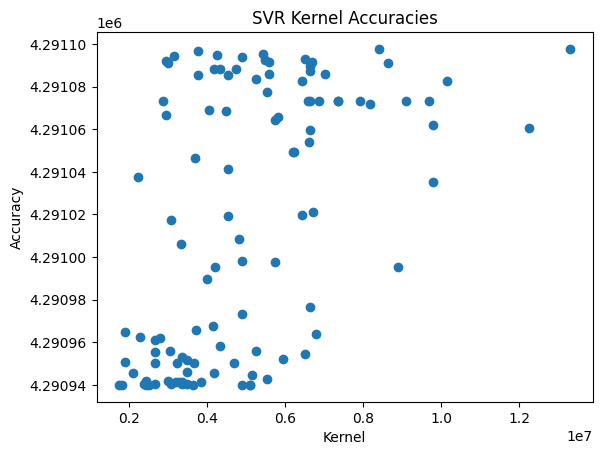

In [202]:
# Visualize the regression model
plt.scatter(y_test, y_pred)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVR Kernel Accuracies')
plt.show()